In [2]:
import cv2

In [3]:
from deepface import DeepFace


In [4]:
img = cv2.imread(r'C:\Users\gpnsv\pictures\happy boy.jpg')

In [5]:
import matplotlib.pyplot as plt

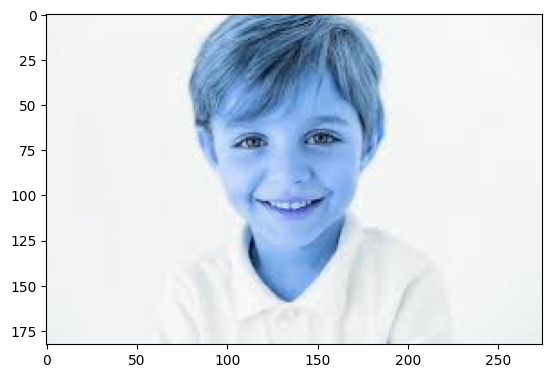

In [6]:
plt.imshow(img) ## BGR

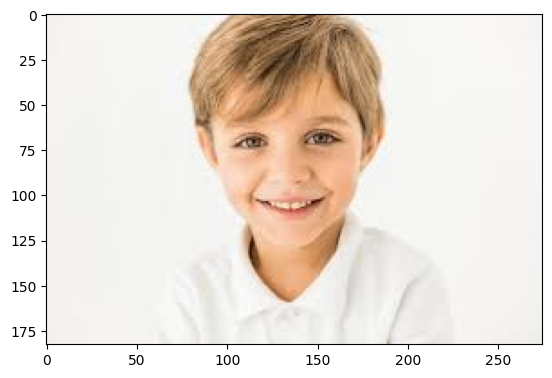

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
predictions =DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]


In [9]:
predictions

[{'emotion': {'angry': np.float32(6.358875e-14),
   'disgust': np.float32(2.9722092e-18),
   'fear': np.float32(1.461938e-13),
   'happy': np.float32(99.99983),
   'sad': np.float32(7.816991e-09),
   'surprise': np.float32(8.696867e-12),
   'neutral': np.float32(0.00016850838)},
  'dominant_emotion': 'happy',
  'region': {'x': 81,
   'y': 29,
   'w': 107,
   'h': 107,
   'left_eye': (151, 68),
   'right_eye': (113, 70)},
  'face_confidence': np.float64(0.93),
  'age': 21,
  'gender': {'Woman': np.float32(99.61951), 'Man': np.float32(0.38049608)},
  'dominant_gender': 'Woman',
  'race': {'asian': np.float32(1.945477e-09),
   'indian': np.float32(1.9988393e-09),
   'black': np.float32(1.0236016e-13),
   'white': np.float32(99.99585),
   'middle eastern': np.float32(0.003597746),
   'latino hispanic': np.float32(0.0005559525)},
  'dominant_race': 'white'}]

In [10]:
predictions = predictions[0]
type(predictions)

dict

In [11]:
predictions['dominant_emotion']


'happy'

In [12]:
# we are trying to draw a rectangle on the face

In [13]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for inserting text on image
cv2.putText(
    img,
    predictions['dominant_emotion'],
    (0, 50),
    font,
    1,
    (0, 0, 255),
    2,
    cv2.LINE_4
)


In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img = cv2.imread(r'C:\Users\gpnsv\pictures\sad girl.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
predictions =DeepFace.analyze(img)

In [ ]:
predictions

In [ ]:
import cv2  # pip install opencv-python
from deepface import DeepFace  # pip install deepface

# Load the face detector
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam (try device 1 first, fallback to 0)
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Analyze emotions with DeepFace
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)[0]

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the dominant emotion
    font = cv2.FONT_HERSHEY_SIMPLEX
    emotion = result.get('dominant_emotion', 'Unknown')
    cv2.putText(frame, emotion, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)

    # Show the frame
    cv2.imshow('Emotion Detection', frame)

    # Press 'q' to quit
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
